# Limpieza de datos - Agrupación de datos

## Resumen

+ Un dummy dataframe con variables categóricas
+ Agrupación de los datos por categorías
+ Agregación de datos
+ Filtrado, transformación y otras operaciones útiles
+ Muestreo aleatorio: cómo dividir un dataset en conjunto de entrenamiento y validación

## Agregación de datos por categoría

Vamos a aprovechar lo que hemos aprendido en la generación de dummy datasets para crear estos dataframes

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
gender = ["Male", "Female"]
income = ["Poor", "Middle Class", "Rich"]

n = 500
gender_data = []
income_data = []

for i in range(500):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [7]:
gender_data[:10]

['Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Female',
 'Female',
 'Female',
 'Male']

In [8]:
income_data[:10]

['Poor',
 'Middle Class',
 'Poor',
 'Rich',
 'Poor',
 'Rich',
 'Poor',
 'Poor',
 'Poor',
 'Middle Class']

In [13]:
# Seguimos creando otras variables
# Z --> N(0, 1)
# N(m, s) --> m + s * Z
height = 160 + 30 * np.random.randn(n)
weight = 65 + 25 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 18000 + 3500 * np.random.randn(n)

In [10]:
# Creamos el dataframe
data = pd.DataFrame(
    {
        "Gender": gender_data,
        "Economic Status": income_data,
        "Height": height,
        "Weight": weight,
        "Age": age,
        "Income": income
    })

In [11]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Poor,185.751872,53.107226,61.605039,21437.068207
1,Female,Middle Class,151.212886,71.136955,37.061704,14106.876703
2,Male,Poor,167.013797,39.525308,35.353023,16680.096648
3,Female,Rich,193.979285,63.992504,10.550607,17403.922340
4,Male,Poor,185.432429,42.670402,36.766006,20175.297058


## Agrupación de datos

In [15]:
grouped_gender = data.groupby("Gender")

In [16]:
grouped_gender.groups

{'Female': Int64Index([  1,   3,   5,   6,   7,   8,  11,  12,  16,  24,
             ...
             480, 481, 485, 487, 488, 492, 493, 495, 496, 497],
            dtype='int64', length=251),
 'Male': Int64Index([  0,   2,   4,   9,  10,  13,  14,  15,  17,  18,
             ...
             482, 483, 484, 486, 489, 490, 491, 494, 498, 499],
            dtype='int64', length=249)}

In [17]:
for names, groups in grouped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status      Height      Weight        Age        Income
1    Female    Middle Class  151.212886   71.136955  37.061704  14106.876703
3    Female            Rich  193.979285   63.992504  10.550607  17403.922340
5    Female            Rich  169.170331   68.992410  37.240577  15788.611823
6    Female            Poor  169.592252   73.009539  42.990746  18763.388988
7    Female            Poor  126.275139   32.495667  26.349105  21300.415933
8    Female            Poor  194.547457   32.067605  20.750257  15890.851043
11   Female            Poor  125.968870   12.724963  33.950036  22633.848687
12   Female            Rich  196.770523   47.480291  26.905722  14761.706624
16   Female    Middle Class   96.386695   62.525153  18.070883  15300.514375
24   Female            Rich  142.632318  102.033995  21.976021  16921.766009
25   Female    Middle Class  218.200993   69.258457  33.097919  18731.111858
26   Female            Rich  115.854064   34.376602  15.826982  17961

In [18]:
grouped_gender.get_group("Female")

,Gender,Economic Status,Height,Weight,Age,Income
1,Female,Middle Class,151.212886,71.136955,37.061704,14106.876703
3,Female,Rich,193.979285,63.992504,10.550607,17403.922340
5,Female,Rich,169.170331,68.992410,37.240577,15788.611823
6,Female,Poor,169.592252,73.009539,42.990746,18763.388988
7,Female,Poor,126.275139,32.495667,26.349105,21300.415933
8,Female,Poor,194.547457,32.067605,20.750257,15890.851043
11,Female,Poor,125.968870,12.724963,33.950036,22633.848687
12,Female,Rich,196.770523,47.480291,26.905722,14761.706624
16,Female,Middle Class,96.386695,62.525153,18.070883,15300.514375
24,Female,Rich,142.632318,102.033995,21.976021,16921.766009


In [20]:
double_group = data.groupby(["Gender", "Economic Status"])

In [21]:
for names, groups in double_group:
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status      Height      Weight        Age        Income
1    Female    Middle Class  151.212886   71.136955  37.061704  14106.876703
16   Female    Middle Class   96.386695   62.525153  18.070883  15300.514375
25   Female    Middle Class  218.200993   69.258457  33.097919  18731.111858
36   Female    Middle Class  197.998643   80.507048  35.709810  16652.925730
38   Female    Middle Class  134.106408   51.111742  25.469959  19356.374835
39   Female    Middle Class  172.333939   61.108740  21.045590  17636.529787
41   Female    Middle Class  137.543982   48.208352  49.884242  16253.498551
47   Female    Middle Class  188.324257   93.845321  39.252416  19893.763068
49   Female    Middle Class  131.949598   86.100520  36.113462  22830.031446
53   Female    Middle Class  153.062634   66.482937  32.691706  25001.957914
54   Female    Middle Class  154.202058   79.086483  36.005928  20437.769218
64   Female    Middle Class  178.608570   10.3020

## Operaciones sobre datos agrupados

In [22]:
double_group.sum()

Height       Weight          Age        Income
Gender Economic Status                                                      
Female Middle Class     14027.879497  5421.216067  2726.410677  1.562557e+06
       Poor             11975.911041  4709.884073  2290.673797  1.337809e+06
       Rich             13882.173913  6013.047877  2566.718167  1.613052e+06
Male   Middle Class     15486.356198  5689.264690  2906.992655  1.720965e+06
       Poor             12548.170196  5149.447896  2414.359232  1.450734e+06
       Rich             12406.511443  4631.991812  2210.485848  1.363985e+06

In [23]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     165.033876  63.779013  32.075420  18383.027773
       Poor             157.577777  61.972159  30.140445  17602.746914
       Rich             154.246377  66.811643  28.519091  17922.803968
Male   Middle Class     163.014276  59.886997  30.599923  18115.419221
       Poor             158.837597  65.182885  30.561509  18363.718753
       Rich             165.420153  61.759891  29.473145  18186.462107

In [24]:
double_group.size()

Gender  Economic Status
Female  Middle Class       85
        Poor               76
        Rich               90
Male    Middle Class       95
        Poor               79
        Rich               75
dtype: int64

In [25]:
double_group.describe()

Age                                             \
                       count       mean        std       min        25%   
Gender Economic Status                                                    
Female Middle Class     85.0  32.075420  12.191427 -5.607989  24.497092   
       Poor             76.0  30.140445  10.665032  6.839238  22.701261   
       Rich             90.0  28.519091  12.608752  1.708123  18.991486   
Male   Middle Class     95.0  30.599923  12.160442  2.716288  22.372149   
       Poor             79.0  30.561509  12.728531  0.939306  24.367560   
       Rich             75.0  29.473145  12.902931 -9.657396  21.076227   

                                                        Height              \
                              50%        75%        max  count        mean   
Gender Economic Status                                                       
Female Middle Class     33.264492  39.193832  58.860452   85.0  165.033876   
       Poor             29.799815  37.557389  51.413074   76.0  157.577777   
       Rich             27.016903  34.995075  60.472317   90.0  154.246377   
Male   Middle Class     29.231594  39.602637  59.220346   95.0  163.014276   
       Poor             31.789991  37.044125  61.605039   79.0  158.837597   
       Rich             29.340063  39.477398  64.179100   75.0  165.420153   

                           ...            Income               Weight  \
                           ...               75%           max  count   
Gender Economic Status     ...                                          
Female Middle Class        ...      20552.911750  28645.208586   85.0   
       Poor                ...      20422.425061  26210.283277   76.0   
       Rich                ...      19957.456109  27627.476119   90.0   
Male   Middle Class        ...      19914.289821  27570.298109   95.0   
       Poor                ...      20785.148014  28984.781815   79.0   
       Rich                ...      20212.862197  28099.447140   75.0   

                                                                               \
                             mean        std        min        25%        50%   
Gender Economic Status                                                          
Female Middle Class     63.779013  23.863723   0.814615  50.180121  62.525153   
       Poor             61.972159  27.211142   3.699563  39.817562  64.944383   
       Rich             66.811643  24.881676  22.797576  47.575450  66.588156   
Male   Middle Class     59.886997  22.715174   6.988721  43.111193  59.946553   
       Poor             65.182885  26.771331   4.001197  47.642918  65.161064   
       Rich             61.759891  27.514899  -0.137947  44.515254  65.746238   

                                               
                              75%         max  
Gender Economic Status                         
Female Middle Class     79.086483  119.575632  
       Poor             81.791678  122.167701  
       Rich             79.972932  130.205573  
Male   Middle Class     71.786855  117.900489  
       Poor             79.151925  130.260378  
       Rich             80.515267  141.239141  

[6 rows x 32 columns]

In [27]:
grouped_income = double_group["Income"]

In [28]:
grouped_income.describe()

count          mean          std           min  \
Gender Economic Status                                                   
Female Middle Class      85.0  18383.027773  3503.015144  10134.789739   
       Poor              76.0  17602.746914  4119.622590   7048.472725   
       Rich              90.0  17922.803968  3995.492350   6503.983246   
Male   Middle Class      95.0  18115.419221  3141.161182  10858.723409   
       Poor              79.0  18363.718753  3913.159676   9187.285570   
       Rich              75.0  18186.462107  3394.040358  11490.502716   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middle Class     16253.498551  18640.135526  20552.911750  28645.208586  
       Poor             15194.697914  17735.093257  20422.425061  26210.283277  
       Rich             15056.962866  17937.429840  19957.456109  27627.476119  
Male   Middle Class     16387.429869  17813.899958  19914.289821  27570.298109  
       Poor             15709.843429  18697.614511  20785.148014  28984.781815  
       Rich             15953.713436  18213.882982  20212.862197  28099.447140

In [29]:
double_group.aggregate(
    {
        "Income": np.sum,
        "Age": np.mean,
        "Height": np.std
    }
)

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.562557e+06  32.075420  31.569806
       Poor             1.337809e+06  30.140445  31.831698
       Rich             1.613052e+06  28.519091  31.306832
Male   Middle Class     1.720965e+06  30.599923  32.825750
       Poor             1.450734e+06  30.561509  25.938249
       Rich             1.363985e+06  29.473145  32.621607

In [30]:
double_group.aggregate(
    {
        "Age": np.mean,
        "Height": lambda h: np.mean(h)/np.std(h)
    })

Age    Height
Gender Economic Status                     
Female Middle Class     32.075420  5.258611
       Poor             30.140445  4.983235
       Rich             28.519091  4.954526
Male   Middle Class     30.599923  4.992394
       Poor             30.561509  6.162812
       Rich             29.473145  5.105025

In [31]:
double_group.aggregate([np.sum, np.mean, np.std])

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     14027.879497  165.033876  31.569806  5421.216067   
       Poor             11975.911041  157.577777  31.831698  4709.884073   
       Rich             13882.173913  154.246377  31.306832  6013.047877   
Male   Middle Class     15486.356198  163.014276  32.825750  5689.264690   
       Poor             12548.170196  158.837597  25.938249  5149.447896   
       Rich             12406.511443  165.420153  32.621607  4631.991812   

                                                      Age             \
                             mean        std          sum       mean   
Gender Economic Status                                                 
Female Middle Class     63.779013  23.863723  2726.410677  32.075420   
       Poor             61.972159  27.211142  2290.673797  30.140445   
       Rich             66.811643  24.881676  2566.718167  28.519091   
Male   Middle Class     59.886997  22.715174  2906.992655  30.599923   
       Poor             65.182885  26.771331  2414.359232  30.561509   
       Rich             61.759891  27.514899  2210.485848  29.473145   

                                         Income                             
                              std           sum          mean          std  
Gender Economic Status                                                      
Female Middle Class     12.191427  1.562557e+06  18383.027773  3503.015144  
       Poor             10.665032  1.337809e+06  17602.746914  4119.622590  
       Rich             12.608752  1.613052e+06  17922.803968  3995.492350  
Male   Middle Class     12.160442  1.720965e+06  18115.419221  3141.161182  
       Poor             12.728531  1.450734e+06  18363.718753  3913.159676  
       Rich             12.902931  1.363985e+06  18186.462107  3394.040358

## Filtrado de datos

In [32]:
double_group.sum()

Height       Weight          Age        Income
Gender Economic Status                                                      
Female Middle Class     14027.879497  5421.216067  2726.410677  1.562557e+06
       Poor             11975.911041  4709.884073  2290.673797  1.337809e+06
       Rich             13882.173913  6013.047877  2566.718167  1.613052e+06
Male   Middle Class     15486.356198  5689.264690  2906.992655  1.720965e+06
       Poor             12548.170196  5149.447896  2414.359232  1.450734e+06
       Rich             12406.511443  4631.991812  2210.485848  1.363985e+06

In [33]:
double_group["Age"].filter(lambda x: x.sum()>2400)

0      61.605039
1      37.061704
2      35.353023
3      10.550607
4      36.766006
5      37.240577
9      36.171141
10     22.403810
12     26.905722
14     23.271561
15     44.504336
16     18.070883
17     34.963116
18     25.226244
19     30.224560
21     26.760288
22      9.921340
24     21.976021
25     33.097919
26     15.826982
27     23.869681
28     23.771820
29     37.421820
32     19.609667
34     55.896074
35     18.785426
36     35.709810
37     49.206864
38     25.469959
39     21.045590
         ...    
458    37.370672
460    36.964692
461    30.899125
463    27.456818
464    52.777788
465    18.693176
466    45.909108
467    42.696836
469    20.551448
470    26.551257
472     5.442472
475    42.289785
476    28.545396
481    37.560508
482    24.865439
483    47.446651
484    31.694994
485    34.543004
486    30.038501
487    38.533818
488    21.270694
489    34.969219
490    33.292067
492    26.954821
494    22.493641
495    25.034694
496    34.296262
497    12.3743

## Transformación de variables

In [34]:
zscore = lambda x: (x - x.mean()) / x.std()

In [35]:
double_group.transform(zscore)

,Height,Weight,Age,Income
0,1.037629,-0.451067,2.438893,0.785388
1,-0.437791,0.308332,0.408999,-1.220706
2,0.315218,-0.958398,0.376439,-0.430246
3,1.269145,-0.113302,-1.425080,-0.129867
4,1.025313,-0.840918,0.487448,0.462945
5,0.476700,0.087646,0.691701,-0.534150
6,0.377437,0.405620,1.204900,0.281735
7,-0.983379,-1.083251,-0.355493,0.897575
8,1.161411,-1.098982,-0.880465,-0.415547
9,1.488573,-2.103732,0.458143,1.516724


(array([  3.,  13.,  23.,  72.,  93., 119.,  89.,  58.,  21.,   9.]),
 array([-3.09097592, -2.51290102, -1.93482613, -1.35675123, -0.77867633,
        -0.20060143,  0.37747347,  0.95554837,  1.53362326,  2.11169816,
         2.68977306]),
 <a list of 10 Patch objects>)

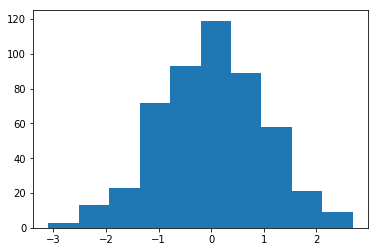

In [37]:
z_group = double_group.transform(zscore)
plt.hist(z_group["Age"])

## Operaciones diversas útiles

In [42]:
double_group.head(1)   # Muestra el primero de cada uno de los grupos

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Poor,185.751872,53.107226,61.605039,21437.068207
1,Female,Middle Class,151.212886,71.136955,37.061704,14106.876703
3,Female,Rich,193.979285,63.992504,10.550607,17403.922340
6,Female,Poor,169.592252,73.009539,42.990746,18763.388988
9,Male,Middle Class,211.877791,12.100348,36.171141,22879.693695
13,Male,Rich,200.918166,41.662039,18.086007,18613.400980


In [41]:
double_group.tail(1)   # Muestra el último de cada uno de los grupos

,Gender,Economic Status,Height,Weight,Age,Income
491,Male,Rich,110.769113,50.311588,35.298958,11490.502716
493,Female,Poor,134.207575,16.981114,36.414819,22989.405439
495,Female,Middle Class,216.452308,52.972631,25.034694,14592.488992
497,Female,Rich,117.610606,53.677420,12.374316,18978.309166
498,Male,Middle Class,159.640331,45.435606,27.798042,22853.330078
499,Male,Poor,104.882909,74.995956,39.965401,15190.599672


In [44]:
double_group.nth(32)  # Muestra el elemento 32

Age      Height        Income     Weight
Gender Economic Status                                                
Female Middle Class     30.173239  183.341941  20294.787837  77.207253
       Poor             35.250459  121.701842  15368.934948  69.360827
       Rich             60.472317  111.107411  12520.067130  37.670216
Male   Middle Class     23.257788  150.954094  17374.885823  34.910357
       Poor             33.366392  179.258194  18207.091809  53.253692
       Rich             16.544861  241.337655  14269.926341  83.721664

In [46]:
data_sorted = data.sort_values(["Age", "Income"])
data_sorted.head()

,Gender,Economic Status,Height,Weight,Age,Income
270,Male,Rich,135.121891,65.746238,-9.657396,11503.752055
89,Female,Middle Class,181.626103,60.170062,-5.607989,16764.268214
133,Male,Rich,191.651527,16.788172,-5.043786,18259.390048
262,Male,Poor,187.674855,65.161064,0.939306,22343.242153
414,Female,Rich,102.613488,39.109902,1.708123,19884.019512


In [47]:
age_grouped = data_sorted.groupby("Gender")
age_grouped.head()

,Gender,Economic Status,Height,Weight,Age,Income
270,Male,Rich,135.121891,65.746238,-9.657396,11503.752055
89,Female,Middle Class,181.626103,60.170062,-5.607989,16764.268214
133,Male,Rich,191.651527,16.788172,-5.043786,18259.390048
262,Male,Poor,187.674855,65.161064,0.939306,22343.242153
414,Female,Rich,102.613488,39.109902,1.708123,19884.019512
254,Male,Middle Class,140.473920,38.455410,2.716288,17533.527770
46,Male,Middle Class,158.276464,68.341109,2.964216,17117.589513
183,Female,Middle Class,178.397646,50.597818,5.030911,20021.929680
258,Female,Middle Class,165.520128,69.216605,5.475103,18337.214409
239,Female,Poor,171.914946,86.504548,6.839238,17251.260364


## Conjunto de entrenamiento y conjunto de testing

In [48]:
data = pd.read_csv("./data/customer-churn-model/Customer Churn Model.txt")
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


### 1er Método: Dividir utilizando la distribución normal

(array([  1.,   7.,  50., 247., 646., 941., 830., 460., 122.,  29.]),
 array([-4.18630391, -3.4572114 , -2.72811889, -1.99902638, -1.26993387,
        -0.54084136,  0.18825115,  0.91734367,  1.64643618,  2.37552869,
         3.1046212 ]),
 <a list of 10 Patch objects>)

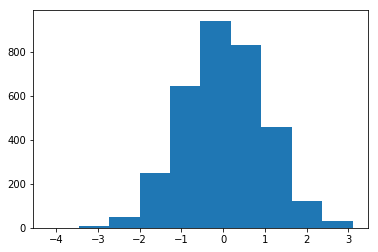

In [59]:
a = np.random.randn(len(data))
plt.hist(a)

In [60]:
check = (a < 0.75)
check

array([ True,  True,  True, ...,  True, False,  True])

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

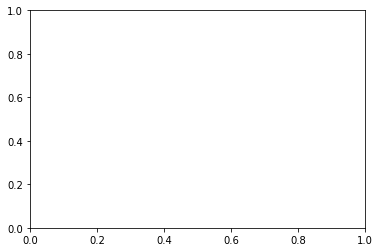

In [61]:
plt.hist(check)